<a href="https://colab.research.google.com/github/suneel-nadipalli/hackduke23-docburnout/blob/main/hackduke23_docburnout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [8]:
data = pd.read_csv('/content/SaYoPillow.csv')
data

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [9]:
data.columns = ['snoring_rate', 'resp_rate', 'body_temp', 'limb_movement',
                'body_ox', 'eye_movement', 'sleep_hrs', 'heart_rate', 'stress_level']
data

,snoring_rate,resp_rate,body_temp,limb_movement,body_ox,eye_movement,sleep_hrs,heart_rate,stress_level
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [10]:
data.drop(columns=['snoring_rate', 'limb_movement', 'sleep_hrs', 'eye_movement'], inplace=True)
data

,resp_rate,body_temp,body_ox,heart_rate,stress_level
0,25.680,91.840,89.840,74.20,3
1,25.104,91.552,89.552,72.76,3
2,20.000,96.000,95.000,60.00,1
3,23.536,90.768,88.768,68.84,3
4,17.248,97.872,96.248,53.12,0
...,...,...,...,...,...
625,20.960,92.960,90.960,62.40,2
626,17.376,98.064,96.376,53.44,0
627,27.504,86.880,84.256,78.76,4
628,19.728,95.728,94.592,59.32,1


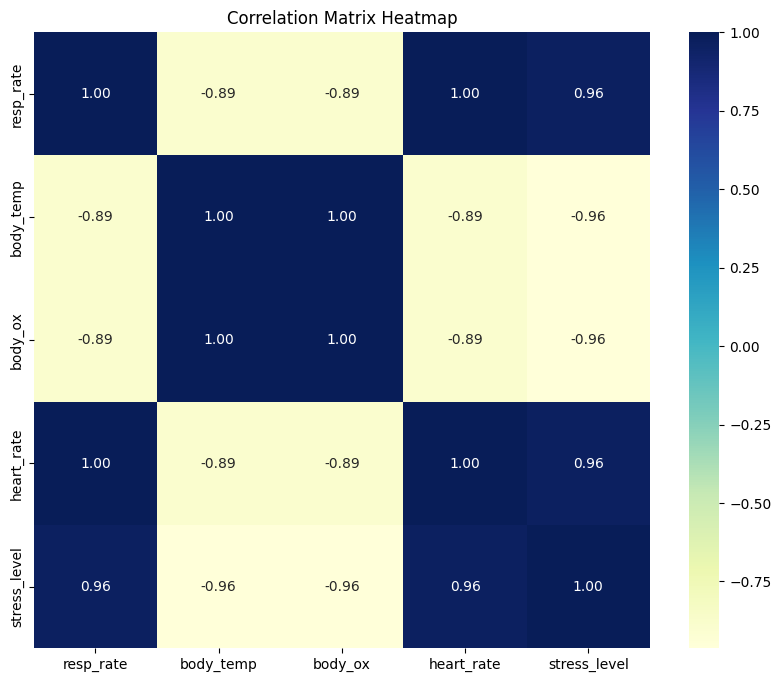

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", square=True)

plt.title("Correlation Matrix Heatmap")
plt.show()

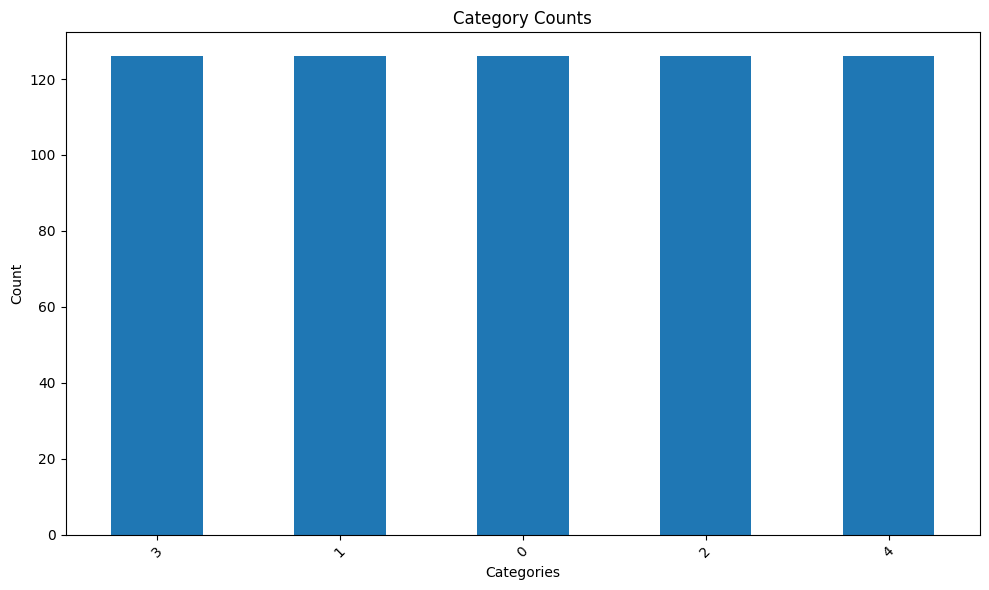

In [17]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Replace 'Column_Name' with the actual name of the column you want to visualize
category_counts = data['stress_level'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Category Counts')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

# Machine Learning Model

## Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into features (X) and target variable (y)
X = data.drop('stress_level', axis=1)  # Features
y = data['stress_level']  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Instantiate classifier, train

In [20]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

## Test

In [21]:
# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

## Evaluate performance

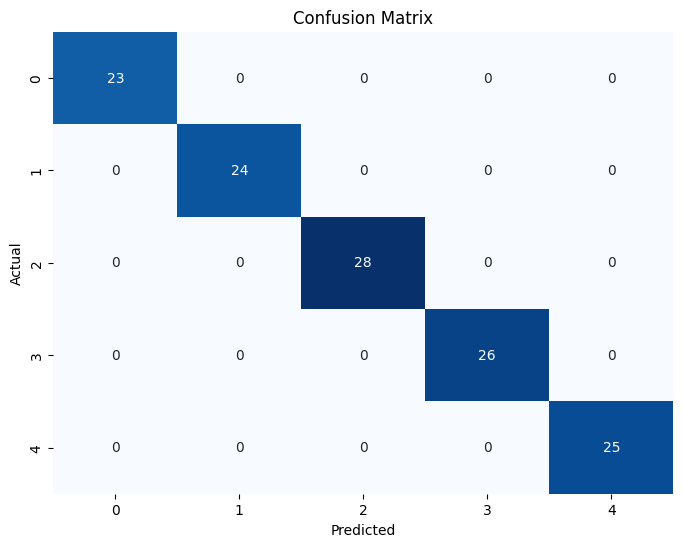

In [26]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()